<a href="https://colab.research.google.com/github/AnusreeChittineni/VAIL_2021/blob/main/MNIST_Diff_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import keras
from keras.datasets import mnist
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/
import matplotlib.pyplot as plt

In [14]:
# Load & Split Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape: ", x_train.shape) # 60000 images, 28 x 28 pixels
print("Test data shape", x_test.shape) # 10000 images, 28 x 28 pixels

print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9]


In [15]:
# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

In [16]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [21]:
# Building the network

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


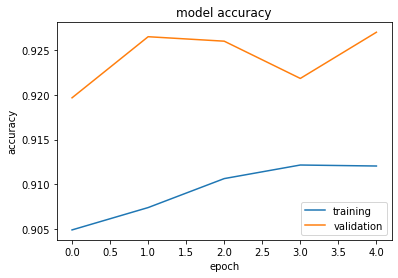

Test loss: 0.328
Test accuracy: 0.913


In [24]:
# Training and evaluating the model

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [27]:
# Shortcut model functions
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


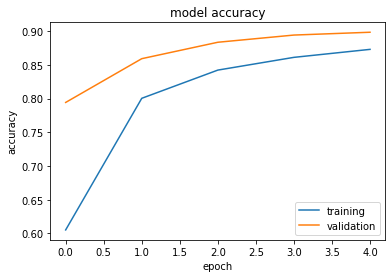


Test loss: 0.505
Test accuracy: 0.883
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


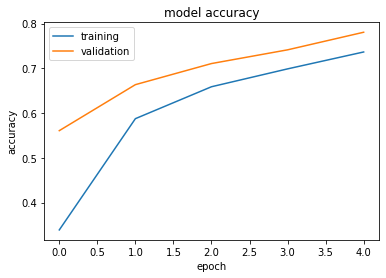


Test loss: 1.19
Test accuracy: 0.763
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_26 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


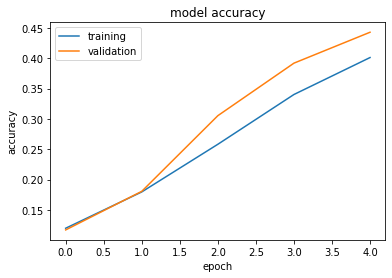


Test loss: 2.13
Test accuracy: 0.429
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_30 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


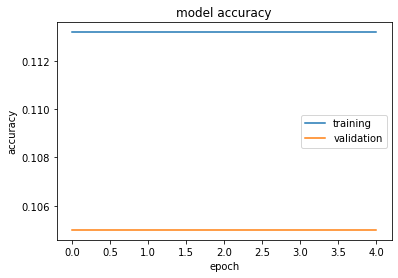


Test loss: 2.29
Test accuracy: 0.113


In [29]:
# Tests various nn architectures
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


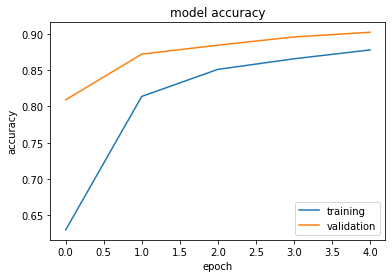


Test loss: 0.502
Test accuracy: 0.887
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_37 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


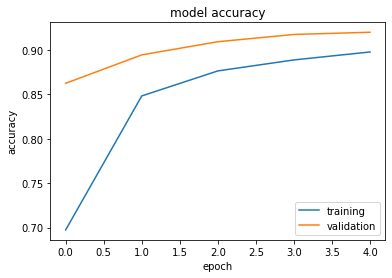


Test loss: 0.374
Test accuracy: 0.903
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


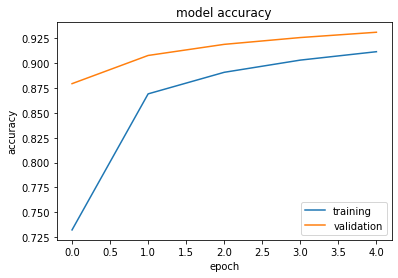


Test loss: 0.321
Test accuracy: 0.916
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_41 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


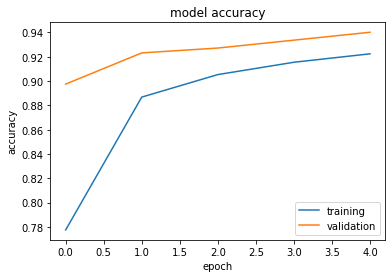


Test loss: 0.277
Test accuracy: 0.925
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_43 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


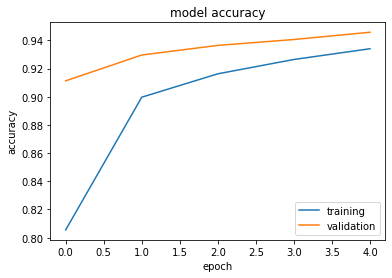


Test loss: 0.238
Test accuracy: 0.933
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_45 (Dense)             (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


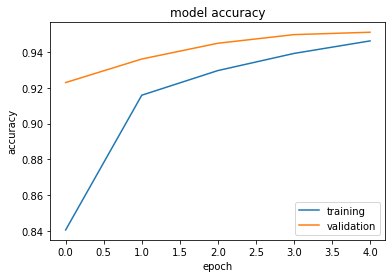


Test loss: 0.206
Test accuracy: 0.942
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_47 (Dense)             (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


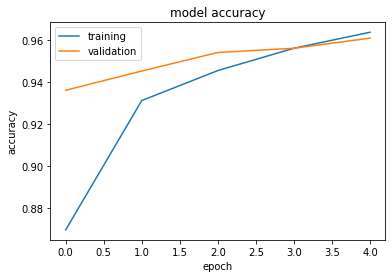


Test loss: 0.176
Test accuracy: 0.949


In [30]:
# test various layer widths
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    model = create_dense([nodes])
    evaluate(model)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_49 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_50 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_51 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


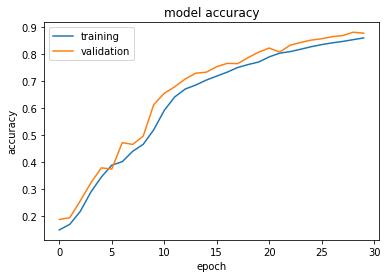


Test loss: 0.61
Test accuracy: 0.864
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_53 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_54 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_55 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_56 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


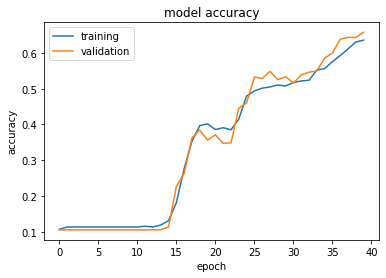


Test loss: 1.08
Test accuracy: 0.643
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_58 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_59 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_60 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_61 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_62 (Dense)             (None, 10)                330       
Total params: 29,674
Trainable params: 29,674
Non-trainable params: 0
___________

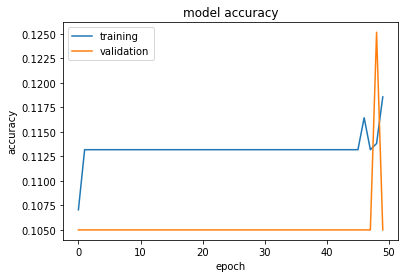


Test loss: 2.28
Test accuracy: 0.113
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_64 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_65 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_66 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


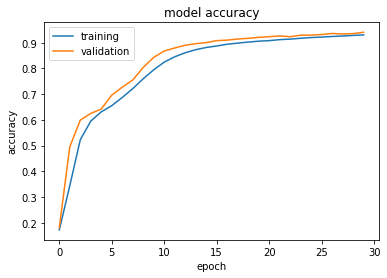


Test loss: 0.271
Test accuracy: 0.926
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_68 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_69 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_70 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_71 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


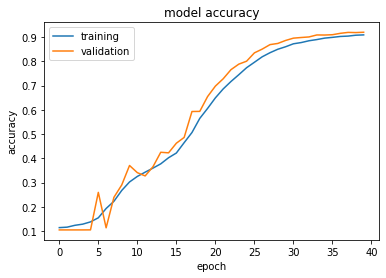


Test loss: 0.388
Test accuracy: 0.905
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_73 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_74 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_75 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_76 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_77 (Dense)             (None, 10)                1290      
Total params: 167,818
Trainable params: 167,818
Non-trainable params: 0
________

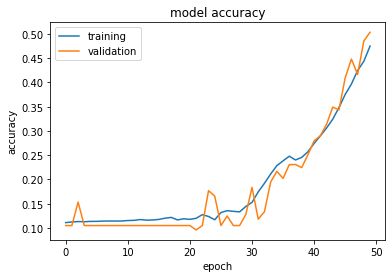


Test loss: 1.48
Test accuracy: 0.497
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_79 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_80 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_81 (Dense)             (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


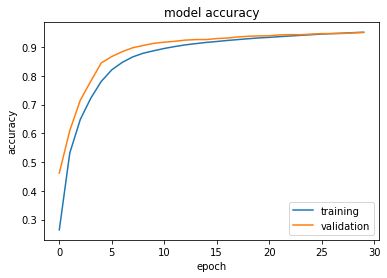


Test loss: 0.211
Test accuracy: 0.937
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_83 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_84 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_85 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_86 (Dense)             (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


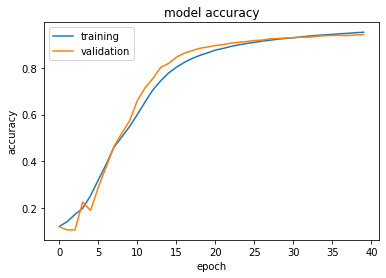


Test loss: 0.245
Test accuracy: 0.932
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_88 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_89 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_90 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_91 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_92 (Dense)             (None, 10)                5130      
Total params: 1,457,674
Trainable params: 1,457,674
Non-trainable params: 0
____

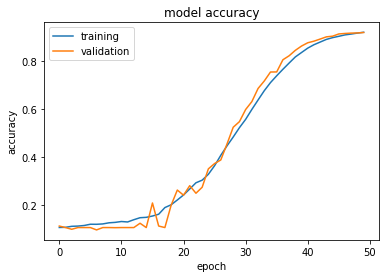


Test loss: 0.371
Test accuracy: 0.911


In [31]:
# test various models with differing width and depths
for nodes_per_layer in [32, 128, 512]:
    for layers in [3, 4, 5]:
        model = create_dense([nodes_per_layer] * layers)
        evaluate(model, epochs=10*layers)